In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
file_data = "drybeans.csv"

raw_data = pd.read_csv(file_data, header=None)

raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
x = raw_data.iloc[:,:16]

x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [4]:
num_features = len(x.columns)

print("Number of Features: {}".format(num_features))

Number of Features: 16


In [5]:
columns = []

for i in range(num_features):
    columns.append("x{}".format(i))

x.columns = columns

x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [6]:
y = pd.get_dummies(raw_data.iloc[:,-1], prefix='y')

y

,y_BARBUNYA,y_BOMBAY,y_CALI,y_DERMASON,y_HOROZ,y_SEKER,y_SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13606,0,0,0,1,0,0,0
13607,0,0,0,1,0,0,0
13608,0,0,0,1,0,0,0
13609,0,0,0,1,0,0,0


In [7]:
x_normalized = (x - x.min()) / (x.max() - x.min())

x_normalized

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=25)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

len_input = len(x_train.columns)
len_output = len(y_train.columns)

print("Len Input: {}".format(len_input))
print("Len Output: {}".format(len_output))

Len Input: 16
Len Output: 7


In [9]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [10]:
def one_hot_encoding(nd_array):
    one_hot_encoding_predictions = nd_array

    for i in range(len(nd_array)):
        max_pred = max(nd_array[i])

        for j in range(len(nd_array[i])):
            one_hot_encoding_predictions[i][j] = 1 if nd_array[i][j] == max_pred else 0

    return one_hot_encoding_predictions

In [11]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_1 = nn.Linear(input_dim, 15)
        self.input_2 = nn.Linear(15, 10)
        self.input_3 = nn.Linear(10, 8)
        self.output = nn.Linear(8, output_dim)

    def forward(self, x):
        # f(x) = a(f(x))
        x = F.relu(self.input_1(x))
        x = F.relu(self.input_2(x))
        x = F.relu(self.input_3(x))
        x = torch.sigmoid(self.output(x))
        y = F.softmax(x, dim=-1)

        return y

model = MultiLayerPerceptron(len_input, len_output)
#model = MultiLayerPerceptron(16, 7)

In [12]:
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    average_loss = 0
    count = 0
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        
        predictions = F.softmax(predictions, dim=-1)
        
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())

        average_loss += loss.item()
        count += 1
    
    average_loss = average_loss / count

    return average_loss

In [13]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 566 trainable parameters


In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = 'cpu'
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

batch_size = 15

epochs = 200

In [15]:
x_train = torch.tensor(x_train.values).float().to(device)
y_train = torch.tensor(y_train.values).float().to(device)

x_test = torch.tensor(x_test.values).float().to(device)
y_test = torch.tensor(y_test.values).float().to(device)

training_ds = CustomDataset(x_train, y_train)

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([13586, 16])
torch.Size([13586, 7])
torch.Size([25, 16])
torch.Size([25, 7])


In [16]:
# Convert y_test to numpy array
y_test = y_test.detach().cpu().numpy()

# Array to store the losses
losses = []

# Array to store accuracy score
accuracies = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    average_loss = train_fn(train_loader, model, optimizer, criterion, device)

    # Perform a prediction at every epoch
    one_hot_encoding_predictions = one_hot_encoding(
        model.forward(x_test).detach().cpu().numpy()
    )

    print(one_hot_encoding)

    # Get the accuracy at every epoch
    acc_score = accuracy_score(
        y_test,
        one_hot_encoding_predictions
    )

    losses.append(average_loss)

    accuracies.append(acc_score)

    print("Average Loss: {}".format(average_loss))
    print("Acc Score: {}".format(acc_score))

Epoch: 0


100%|█████████████████████████████| 906/906 [00:03<00:00, 294.85it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.937033231289971
Acc Score: 0.28
Epoch: 1


100%|█████████████████████████████| 906/906 [00:02<00:00, 310.17it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9326172277627403
Acc Score: 0.28
Epoch: 2


100%|█████████████████████████████| 906/906 [00:03<00:00, 284.26it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9322683888818517
Acc Score: 0.4
Epoch: 3


100%|█████████████████████████████| 906/906 [00:03<00:00, 261.64it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9321367053796124
Acc Score: 0.4
Epoch: 4


100%|█████████████████████████████| 906/906 [00:03<00:00, 247.95it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9320512921868045
Acc Score: 0.28
Epoch: 5


100%|█████████████████████████████| 906/906 [00:03<00:00, 273.17it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9319646838748166
Acc Score: 0.28
Epoch: 6


100%|█████████████████████████████| 906/906 [00:03<00:00, 276.73it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9318411712088595
Acc Score: 0.28
Epoch: 7


100%|█████████████████████████████| 906/906 [00:02<00:00, 326.24it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9314953315073817
Acc Score: 0.24
Epoch: 8


100%|█████████████████████████████| 906/906 [00:02<00:00, 307.95it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9303424114949392
Acc Score: 0.28
Epoch: 9


100%|█████████████████████████████| 906/906 [00:03<00:00, 288.35it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9296913779860827
Acc Score: 0.28
Epoch: 10


100%|█████████████████████████████| 906/906 [00:02<00:00, 322.67it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9291772316096898
Acc Score: 0.4
Epoch: 11


100%|█████████████████████████████| 906/906 [00:02<00:00, 318.47it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9285870322065375
Acc Score: 0.48
Epoch: 12


100%|█████████████████████████████| 906/906 [00:02<00:00, 303.14it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.927552607938417
Acc Score: 0.48
Epoch: 13


100%|█████████████████████████████| 906/906 [00:02<00:00, 308.47it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.927025377618819
Acc Score: 0.52
Epoch: 14


100%|█████████████████████████████| 906/906 [00:02<00:00, 315.04it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.926866565450664
Acc Score: 0.52
Epoch: 15


100%|█████████████████████████████| 906/906 [00:02<00:00, 306.60it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9267560160712691
Acc Score: 0.52
Epoch: 16


100%|█████████████████████████████| 906/906 [00:02<00:00, 336.24it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9266705605104797
Acc Score: 0.52
Epoch: 17


100%|█████████████████████████████| 906/906 [00:03<00:00, 295.68it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.926601080836576
Acc Score: 0.52
Epoch: 18


100%|█████████████████████████████| 906/906 [00:02<00:00, 348.80it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9265304884110592
Acc Score: 0.52
Epoch: 19


100%|█████████████████████████████| 906/906 [00:03<00:00, 300.20it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9261250532752368
Acc Score: 0.56
Epoch: 20


100%|█████████████████████████████| 906/906 [00:02<00:00, 332.03it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9254733866150542
Acc Score: 0.52
Epoch: 21


100%|█████████████████████████████| 906/906 [00:02<00:00, 329.01it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9253756218398643
Acc Score: 0.52
Epoch: 22


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.42it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9253270252387782
Acc Score: 0.52
Epoch: 23


100%|█████████████████████████████| 906/906 [00:02<00:00, 319.12it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9252919978390204
Acc Score: 0.52
Epoch: 24


100%|█████████████████████████████| 906/906 [00:02<00:00, 346.79it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9252537111309718
Acc Score: 0.52
Epoch: 25


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.96it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9252197841145344
Acc Score: 0.56
Epoch: 26


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.91it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.925195157396346
Acc Score: 0.56
Epoch: 27


100%|█████████████████████████████| 906/906 [00:02<00:00, 322.77it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.925174565636296
Acc Score: 0.56
Epoch: 28


100%|█████████████████████████████| 906/906 [00:02<00:00, 325.49it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9251405259894483
Acc Score: 0.6
Epoch: 29


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.72it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9251049745161801
Acc Score: 0.6
Epoch: 30


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.03it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9250848556459608
Acc Score: 0.6
Epoch: 31


100%|█████████████████████████████| 906/906 [00:02<00:00, 327.82it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9250716297305446
Acc Score: 0.6
Epoch: 32


100%|█████████████████████████████| 906/906 [00:02<00:00, 344.33it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.925042091352787
Acc Score: 0.6
Epoch: 33


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.24it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9250059983061902
Acc Score: 0.6
Epoch: 34


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.54it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9249811750110937
Acc Score: 0.6
Epoch: 35


100%|█████████████████████████████| 906/906 [00:02<00:00, 329.75it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924961419163424
Acc Score: 0.6
Epoch: 36


100%|█████████████████████████████| 906/906 [00:02<00:00, 344.37it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9249357186405864
Acc Score: 0.6
Epoch: 37


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.12it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9248716907522274
Acc Score: 0.6
Epoch: 38


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9246419770828147
Acc Score: 0.64
Epoch: 39


100%|█████████████████████████████| 906/906 [00:02<00:00, 302.57it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924584633861946
Acc Score: 0.6
Epoch: 40


100%|█████████████████████████████| 906/906 [00:02<00:00, 345.31it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9245595309644872
Acc Score: 0.6
Epoch: 41


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.42it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9245615237069709
Acc Score: 0.6
Epoch: 42


100%|█████████████████████████████| 906/906 [00:02<00:00, 351.13it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9245273539298944
Acc Score: 0.6
Epoch: 43


100%|█████████████████████████████| 906/906 [00:02<00:00, 320.27it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924515766681688
Acc Score: 0.64
Epoch: 44


100%|█████████████████████████████| 906/906 [00:02<00:00, 344.14it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9245041394338966
Acc Score: 0.64
Epoch: 45


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924484986079976
Acc Score: 0.64
Epoch: 46


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.36it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924447665282959
Acc Score: 0.64
Epoch: 47


100%|█████████████████████████████| 906/906 [00:02<00:00, 335.40it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9244448122862423
Acc Score: 0.64
Epoch: 48


100%|█████████████████████████████| 906/906 [00:02<00:00, 345.96it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9244282878524157
Acc Score: 0.64
Epoch: 49


100%|█████████████████████████████| 906/906 [00:02<00:00, 346.15it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9244403849637535
Acc Score: 0.64
Epoch: 50


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9244063037383898
Acc Score: 0.64
Epoch: 51


100%|█████████████████████████████| 906/906 [00:02<00:00, 340.00it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9243964072621158
Acc Score: 0.64
Epoch: 52


100%|█████████████████████████████| 906/906 [00:02<00:00, 339.09it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924385199352079
Acc Score: 0.68
Epoch: 53


100%|█████████████████████████████| 906/906 [00:02<00:00, 351.66it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9243711879184968
Acc Score: 0.68
Epoch: 54


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.28it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924374831696483
Acc Score: 0.72
Epoch: 55


100%|█████████████████████████████| 906/906 [00:02<00:00, 336.28it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.924129852922284
Acc Score: 0.92
Epoch: 56


100%|█████████████████████████████| 906/906 [00:02<00:00, 334.00it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9232259838786345
Acc Score: 0.92
Epoch: 57


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.16it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9229096416342863
Acc Score: 0.96
Epoch: 58


100%|█████████████████████████████| 906/906 [00:02<00:00, 340.45it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9228361877910876
Acc Score: 0.96
Epoch: 59


100%|█████████████████████████████| 906/906 [00:02<00:00, 336.70it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9227900882693578
Acc Score: 0.96
Epoch: 60


100%|█████████████████████████████| 906/906 [00:02<00:00, 347.51it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9227608809407972
Acc Score: 0.96
Epoch: 61


100%|█████████████████████████████| 906/906 [00:02<00:00, 356.55it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9227389051161592
Acc Score: 0.96
Epoch: 62


100%|█████████████████████████████| 906/906 [00:02<00:00, 336.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922729423504002
Acc Score: 0.96
Epoch: 63


100%|█████████████████████████████| 906/906 [00:02<00:00, 335.43it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9227052546758
Acc Score: 0.96
Epoch: 64


100%|█████████████████████████████| 906/906 [00:02<00:00, 340.31it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226956666173787
Acc Score: 0.96
Epoch: 65


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.85it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226910341654393
Acc Score: 0.96
Epoch: 66


100%|█████████████████████████████| 906/906 [00:02<00:00, 308.96it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922665155881288
Acc Score: 1.0
Epoch: 67


100%|█████████████████████████████| 906/906 [00:02<00:00, 328.76it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226628152476768
Acc Score: 0.96
Epoch: 68


100%|█████████████████████████████| 906/906 [00:02<00:00, 342.57it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226521854895366
Acc Score: 0.96
Epoch: 69


100%|█████████████████████████████| 906/906 [00:02<00:00, 342.47it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226603444838366
Acc Score: 1.0
Epoch: 70


100%|█████████████████████████████| 906/906 [00:02<00:00, 309.80it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226273989045857
Acc Score: 0.96
Epoch: 71


100%|█████████████████████████████| 906/906 [00:02<00:00, 325.41it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922628754811571
Acc Score: 0.96
Epoch: 72


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.21it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226137833879484
Acc Score: 1.0
Epoch: 73


100%|█████████████████████████████| 906/906 [00:02<00:00, 357.58it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9226028504750587
Acc Score: 0.96
Epoch: 74


100%|█████████████████████████████| 906/906 [00:02<00:00, 340.36it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225953879209017
Acc Score: 1.0
Epoch: 75


100%|█████████████████████████████| 906/906 [00:02<00:00, 341.15it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225972205334678
Acc Score: 0.96
Epoch: 76


100%|█████████████████████████████| 906/906 [00:02<00:00, 345.99it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225933272843856
Acc Score: 0.96
Epoch: 77


100%|█████████████████████████████| 906/906 [00:02<00:00, 357.03it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225784374388637
Acc Score: 1.0
Epoch: 78


100%|█████████████████████████████| 906/906 [00:02<00:00, 342.49it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225647671859523
Acc Score: 0.96
Epoch: 79


100%|█████████████████████████████| 906/906 [00:02<00:00, 337.58it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922573522884588
Acc Score: 1.0
Epoch: 80


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.09it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225719931636163
Acc Score: 1.0
Epoch: 81


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.88it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225497966833724
Acc Score: 0.96
Epoch: 82


100%|█████████████████████████████| 906/906 [00:02<00:00, 342.51it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922544926733897
Acc Score: 0.96
Epoch: 83


100%|█████████████████████████████| 906/906 [00:02<00:00, 336.47it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225390732419938
Acc Score: 0.96
Epoch: 84


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.65it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225511829847794
Acc Score: 1.0
Epoch: 85


100%|█████████████████████████████| 906/906 [00:02<00:00, 352.56it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225398263920748
Acc Score: 1.0
Epoch: 86


100%|█████████████████████████████| 906/906 [00:02<00:00, 333.30it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922520168174971
Acc Score: 1.0
Epoch: 87


100%|█████████████████████████████| 906/906 [00:02<00:00, 321.07it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225239374779708
Acc Score: 1.0
Epoch: 88


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.53it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225363348493514
Acc Score: 1.0
Epoch: 89


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.39it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225409876958162
Acc Score: 1.0
Epoch: 90


100%|█████████████████████████████| 906/906 [00:02<00:00, 328.97it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225269070524253
Acc Score: 1.0
Epoch: 91


100%|█████████████████████████████| 906/906 [00:02<00:00, 338.95it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224944787046505
Acc Score: 1.0
Epoch: 92


100%|█████████████████████████████| 906/906 [00:02<00:00, 354.43it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922498380637853
Acc Score: 1.0
Epoch: 93


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.56it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225220442081392
Acc Score: 1.0
Epoch: 94


100%|█████████████████████████████| 906/906 [00:02<00:00, 338.01it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922514761652115
Acc Score: 1.0
Epoch: 95


100%|█████████████████████████████| 906/906 [00:02<00:00, 337.71it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9225084121127265
Acc Score: 1.0
Epoch: 96


100%|█████████████████████████████| 906/906 [00:02<00:00, 355.52it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224703104027585
Acc Score: 1.0
Epoch: 97


100%|█████████████████████████████| 906/906 [00:02<00:00, 351.61it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224826471168737
Acc Score: 1.0
Epoch: 98


100%|█████████████████████████████| 906/906 [00:03<00:00, 271.47it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224889417884103
Acc Score: 1.0
Epoch: 99


100%|█████████████████████████████| 906/906 [00:05<00:00, 157.92it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922488027718946
Acc Score: 1.0
Epoch: 100


100%|█████████████████████████████| 906/906 [00:03<00:00, 280.66it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224894050730774
Acc Score: 0.96
Epoch: 101


100%|█████████████████████████████| 906/906 [00:02<00:00, 337.23it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224711303942514
Acc Score: 1.0
Epoch: 102


100%|█████████████████████████████| 906/906 [00:02<00:00, 328.82it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224730786635122
Acc Score: 1.0
Epoch: 103


100%|█████████████████████████████| 906/906 [00:02<00:00, 334.66it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224555675293962
Acc Score: 1.0
Epoch: 104


100%|█████████████████████████████| 906/906 [00:06<00:00, 137.31it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224572148807264
Acc Score: 0.96
Epoch: 105


100%|█████████████████████████████| 906/906 [00:07<00:00, 127.65it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224664666268474
Acc Score: 0.96
Epoch: 106


100%|█████████████████████████████| 906/906 [00:03<00:00, 288.57it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224889224465056
Acc Score: 0.96
Epoch: 107


100%|█████████████████████████████| 906/906 [00:02<00:00, 322.44it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224555447664744
Acc Score: 0.96
Epoch: 108


100%|█████████████████████████████| 906/906 [00:02<00:00, 313.66it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224300955568192
Acc Score: 0.96
Epoch: 109


100%|█████████████████████████████| 906/906 [00:04<00:00, 213.64it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224591901233918
Acc Score: 1.0
Epoch: 110


100%|█████████████████████████████| 906/906 [00:03<00:00, 264.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224187781742341
Acc Score: 1.0
Epoch: 111


100%|█████████████████████████████| 906/906 [00:03<00:00, 282.48it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224513116524973
Acc Score: 1.0
Epoch: 112


100%|█████████████████████████████| 906/906 [00:03<00:00, 271.51it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922451447177407
Acc Score: 0.96
Epoch: 113


100%|█████████████████████████████| 906/906 [00:03<00:00, 258.53it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224578156639671
Acc Score: 1.0
Epoch: 114


100%|█████████████████████████████| 906/906 [00:03<00:00, 289.67it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224334767059512
Acc Score: 0.96
Epoch: 115


100%|█████████████████████████████| 906/906 [00:03<00:00, 290.83it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922422134718358
Acc Score: 0.96
Epoch: 116


100%|█████████████████████████████| 906/906 [00:03<00:00, 256.63it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224540687291565
Acc Score: 0.96
Epoch: 117


100%|█████████████████████████████| 906/906 [00:02<00:00, 303.55it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922432100536018
Acc Score: 1.0
Epoch: 118


100%|█████████████████████████████| 906/906 [00:03<00:00, 290.50it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224256342873143
Acc Score: 0.96
Epoch: 119


100%|█████████████████████████████| 906/906 [00:03<00:00, 291.61it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224366671991664
Acc Score: 0.96
Epoch: 120


100%|█████████████████████████████| 906/906 [00:03<00:00, 294.37it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224026618940677
Acc Score: 1.0
Epoch: 121


100%|█████████████████████████████| 906/906 [00:02<00:00, 312.59it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224435626539436
Acc Score: 0.96
Epoch: 122


100%|█████████████████████████████| 906/906 [00:03<00:00, 295.81it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224103340513132
Acc Score: 1.0
Epoch: 123


100%|█████████████████████████████| 906/906 [00:02<00:00, 309.47it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922429864111852
Acc Score: 0.96
Epoch: 124


100%|█████████████████████████████| 906/906 [00:03<00:00, 286.09it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224023501867753
Acc Score: 0.96
Epoch: 125


100%|█████████████████████████████| 906/906 [00:02<00:00, 302.26it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224030474163838
Acc Score: 0.96
Epoch: 126


100%|█████████████████████████████| 906/906 [00:03<00:00, 276.19it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223966510353763
Acc Score: 0.96
Epoch: 127


100%|█████████████████████████████| 906/906 [00:02<00:00, 302.42it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922403518332551
Acc Score: 0.92
Epoch: 128


100%|█████████████████████████████| 906/906 [00:03<00:00, 301.47it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922392981073451
Acc Score: 0.96
Epoch: 129


100%|█████████████████████████████| 906/906 [00:03<00:00, 238.28it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224147908471805
Acc Score: 0.96
Epoch: 130


100%|█████████████████████████████| 906/906 [00:02<00:00, 304.38it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223912285916327
Acc Score: 0.96
Epoch: 131


100%|█████████████████████████████| 906/906 [00:02<00:00, 314.38it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224263753322577
Acc Score: 0.96
Epoch: 132


100%|█████████████████████████████| 906/906 [00:03<00:00, 296.24it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224053050245407
Acc Score: 0.96
Epoch: 133


100%|█████████████████████████████| 906/906 [00:03<00:00, 289.83it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224050876583747
Acc Score: 1.0
Epoch: 134


100%|█████████████████████████████| 906/906 [00:03<00:00, 277.56it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223878973104043
Acc Score: 0.96
Epoch: 135


100%|█████████████████████████████| 906/906 [00:02<00:00, 323.91it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224061942258417
Acc Score: 0.96
Epoch: 136


100%|█████████████████████████████| 906/906 [00:03<00:00, 274.97it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223759729604322
Acc Score: 0.96
Epoch: 137


100%|█████████████████████████████| 906/906 [00:03<00:00, 253.86it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223842249800827
Acc Score: 0.96
Epoch: 138


100%|█████████████████████████████| 906/906 [00:03<00:00, 271.09it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223822903948904
Acc Score: 1.0
Epoch: 139


100%|█████████████████████████████| 906/906 [00:03<00:00, 240.98it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223944510582003
Acc Score: 0.96
Epoch: 140


100%|█████████████████████████████| 906/906 [00:03<00:00, 265.60it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922406057122001
Acc Score: 0.96
Epoch: 141


100%|█████████████████████████████| 906/906 [00:02<00:00, 328.96it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224008812546467
Acc Score: 0.96
Epoch: 142


100%|█████████████████████████████| 906/906 [00:02<00:00, 310.87it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922355869747945
Acc Score: 0.96
Epoch: 143


100%|█████████████████████████████| 906/906 [00:02<00:00, 304.98it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223756109905032
Acc Score: 1.0
Epoch: 144


100%|█████████████████████████████| 906/906 [00:02<00:00, 343.85it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224041130632228
Acc Score: 1.0
Epoch: 145


100%|█████████████████████████████| 906/906 [00:02<00:00, 352.52it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223826619699829
Acc Score: 1.0
Epoch: 146


100%|█████████████████████████████| 906/906 [00:02<00:00, 328.02it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223779653081832
Acc Score: 1.0
Epoch: 147


100%|█████████████████████████████| 906/906 [00:02<00:00, 342.87it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922368693825425
Acc Score: 1.0
Epoch: 148


100%|█████████████████████████████| 906/906 [00:02<00:00, 356.49it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9224008288867689
Acc Score: 1.0
Epoch: 149


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.99it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922354560024691
Acc Score: 1.0
Epoch: 150


100%|█████████████████████████████| 906/906 [00:02<00:00, 321.73it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223815672444982
Acc Score: 0.96
Epoch: 151


100%|█████████████████████████████| 906/906 [00:02<00:00, 345.14it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223701678890792
Acc Score: 1.0
Epoch: 152


100%|█████████████████████████████| 906/906 [00:02<00:00, 355.77it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.92239458224105
Acc Score: 0.96
Epoch: 153


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.93it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223662076670076
Acc Score: 0.96
Epoch: 154


100%|█████████████████████████████| 906/906 [00:02<00:00, 323.86it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223833048580499
Acc Score: 0.96
Epoch: 155


100%|█████████████████████████████| 906/906 [00:02<00:00, 346.32it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223529255679639
Acc Score: 0.96
Epoch: 156


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.77it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223481187757276
Acc Score: 0.96
Epoch: 157


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.06it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223637290085125
Acc Score: 0.96
Epoch: 158


100%|█████████████████████████████| 906/906 [00:02<00:00, 325.92it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223863485106834
Acc Score: 0.96
Epoch: 159


100%|█████████████████████████████| 906/906 [00:02<00:00, 345.78it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223621933665496
Acc Score: 0.96
Epoch: 160


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.03it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223306600094894
Acc Score: 0.96
Epoch: 161


100%|█████████████████████████████| 906/906 [00:02<00:00, 355.91it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223671601571257
Acc Score: 0.96
Epoch: 162


100%|█████████████████████████████| 906/906 [00:02<00:00, 326.23it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922375713752595
Acc Score: 0.96
Epoch: 163


100%|█████████████████████████████| 906/906 [00:02<00:00, 346.98it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223477761477035
Acc Score: 0.96
Epoch: 164


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.55it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223854324675553
Acc Score: 1.0
Epoch: 165


100%|█████████████████████████████| 906/906 [00:02<00:00, 348.98it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223515741346162
Acc Score: 1.0
Epoch: 166


100%|█████████████████████████████| 906/906 [00:02<00:00, 319.20it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223579545947362
Acc Score: 1.0
Epoch: 167


100%|█████████████████████████████| 906/906 [00:02<00:00, 333.02it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223503603314196
Acc Score: 1.0
Epoch: 168


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.21it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223579132793756
Acc Score: 0.96
Epoch: 169


100%|█████████████████████████████| 906/906 [00:02<00:00, 344.89it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223683113293932
Acc Score: 1.0
Epoch: 170


100%|█████████████████████████████| 906/906 [00:02<00:00, 334.09it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223349879909035
Acc Score: 0.96
Epoch: 171


100%|█████████████████████████████| 906/906 [00:02<00:00, 311.62it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223872811325864
Acc Score: 1.0
Epoch: 172


100%|█████████████████████████████| 906/906 [00:02<00:00, 314.58it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223902904434709
Acc Score: 1.0
Epoch: 173


100%|█████████████████████████████| 906/906 [00:02<00:00, 317.95it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223190385511115
Acc Score: 0.96
Epoch: 174


100%|█████████████████████████████| 906/906 [00:02<00:00, 306.48it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223470654971815
Acc Score: 1.0
Epoch: 175


100%|█████████████████████████████| 906/906 [00:02<00:00, 347.16it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922324923490057
Acc Score: 0.96
Epoch: 176


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.28it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223400005704783
Acc Score: 0.96
Epoch: 177


100%|█████████████████████████████| 906/906 [00:02<00:00, 313.74it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223239927102398
Acc Score: 0.96
Epoch: 178


100%|█████████████████████████████| 906/906 [00:02<00:00, 335.37it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223299451484848
Acc Score: 0.96
Epoch: 179


100%|█████████████████████████████| 906/906 [00:02<00:00, 346.86it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223608423279348
Acc Score: 0.96
Epoch: 180


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.85it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223318617075484
Acc Score: 0.96
Epoch: 181


100%|█████████████████████████████| 906/906 [00:02<00:00, 340.96it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223278933276666
Acc Score: 0.96
Epoch: 182


100%|█████████████████████████████| 906/906 [00:02<00:00, 333.71it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922344160790475
Acc Score: 0.96
Epoch: 183


100%|█████████████████████████████| 906/906 [00:02<00:00, 348.70it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223354249600544
Acc Score: 0.96
Epoch: 184


100%|█████████████████████████████| 906/906 [00:02<00:00, 355.18it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223467099745541
Acc Score: 1.0
Epoch: 185


100%|█████████████████████████████| 906/906 [00:02<00:00, 334.40it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223325682791652
Acc Score: 1.0
Epoch: 186


100%|█████████████████████████████| 906/906 [00:02<00:00, 341.81it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223382821672537
Acc Score: 1.0
Epoch: 187


100%|█████████████████████████████| 906/906 [00:02<00:00, 347.05it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922316266474608
Acc Score: 0.96
Epoch: 188


100%|█████████████████████████████| 906/906 [00:02<00:00, 352.23it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223233664009483
Acc Score: 1.0
Epoch: 189


100%|█████████████████████████████| 906/906 [00:02<00:00, 337.93it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223526339920414
Acc Score: 0.92
Epoch: 190


100%|█████████████████████████████| 906/906 [00:02<00:00, 334.11it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223600158891405
Acc Score: 0.96
Epoch: 191


100%|█████████████████████████████| 906/906 [00:02<00:00, 353.49it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223406683267084
Acc Score: 0.96
Epoch: 192


100%|█████████████████████████████| 906/906 [00:02<00:00, 349.81it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223309147436887
Acc Score: 0.96
Epoch: 193


100%|█████████████████████████████| 906/906 [00:02<00:00, 324.30it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223509975616506
Acc Score: 0.96
Epoch: 194


100%|█████████████████████████████| 906/906 [00:02<00:00, 327.65it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223285305578977
Acc Score: 0.96
Epoch: 195


100%|█████████████████████████████| 906/906 [00:02<00:00, 335.44it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.922327490042377
Acc Score: 1.0
Epoch: 196


100%|█████████████████████████████| 906/906 [00:02<00:00, 350.24it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223001615101138
Acc Score: 0.96
Epoch: 197


100%|█████████████████████████████| 906/906 [00:02<00:00, 331.98it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223511661125334
Acc Score: 1.0
Epoch: 198


100%|█████████████████████████████| 906/906 [00:02<00:00, 344.28it/s, loss=1.92]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223339230019525
Acc Score: 0.96
Epoch: 199


100%|█████████████████████████████| 906/906 [00:02<00:00, 351.43it/s, loss=1.93]


<function one_hot_encoding at 0x7f8d8f4cae50>
Average Loss: 1.9223322222301238
Acc Score: 0.96


In [17]:
predictions = model.forward(x_test)

print(predictions.shape)

torch.Size([25, 7])


In [18]:
one_hot_encoding_predictions = one_hot_encoding(predictions.detach().cpu( ).numpy())

one_hot_encoding_predictions

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [19]:
accuracy = accuracy_score(y_test, one_hot_encoding_predictions)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.96


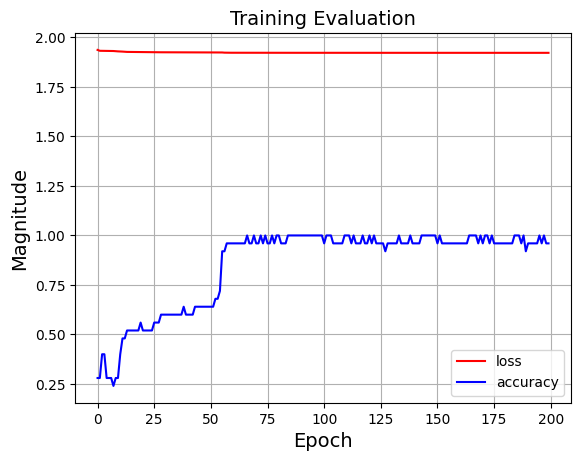

In [20]:
plt.plot(losses, label='loss', color='red')
plt.plot(accuracies, label='accuracy', color='blue')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Accuracy of ReLU MLP: 0.52

Accuracy of Own Modification MLP: 0.96


**What modification did you do to improve the accuracy of your network and what is the intuition behind it?**

I played around with the hyperparameters which are the batch size, epoch, and the learning rate. I mostly kept modifying the values of epoch and batch size while learning rate remained 0.001 because the latter is already a small value. I believed that while it is good to make the learning rate as small as possible, it is not wise to make it any smaller. According to Brownlee (2019), 'learning rate controls how quickly the model is adapted to the problem'. Thus, bigger epochs are expected to be employed (~ I changed it from  100 to 200) to make up for the slower changes. I only slightly increased the batch size value by 5 to see if it will increase the accuracy of the model. 

Source: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/